In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

%matplotlib inline

In [3]:
#read the dataset
df_house = pd.read_csv('melb_data_new.csv')

## Data Description 
 
* `Surburb`: the surburb of the property

* `Address`: address of the property

* `Rooms`: number of rooms

* `Type`: h - house; u - unit; t - townhouse

* `Price`: price in AUD

* `Method`: PI - property passed in; S - property sold; SA - sold after auction; SP - property sold prior; VB - vendor bid

* `SellerG`: agent

* `Date`:date sold

* `Distance`: distance from CBD

* `Postcode`: postcode of the property

* `Bedroom2` : Scraped number of Bedrooms (from different source)

* `Bathroom`: Number of Bathrooms

* `Car`: number of carspots

* `Landsize`:land Size

* `BuildingArea`: building Size

* `YearBuilt`: property built year

* `CouncilArea`: local governing council 

* `Lattitude`,`Longtitude` : geo info of the property

* `Regionname`: General Region (West, North West, North, North east …etc)

* `Propertycount`: number of properties that exist in the suburb.

* There are 21 features, and 13580 instances(i.e., properties) in the dataset.
* Some features have missing values

In [4]:
df_house.info()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [5]:
df_house.isnull().sum().sort_values(ascending=False)

Propertycount    0
Distance         0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
CouncilArea1     0
Lattitude        0
Longtitude       0
Suburb           0
dtype: int64

In [7]:
uni_val = []
for i in df_house.columns:
    u = df_house[i].nunique()
    uni_val.append(u)
    
pd.DataFrame({"No. of unique values": uni_val}, index=df_house.columns)

,No. of unique values
Suburb,314
Address,13378
Rooms,9
Type,3
Price,2204
Method,5
SellerG,268
Date,58
Distance,202
Postcode,198


# 2. data visualization practice

<span style="color:red">SOLVING ENVIONMENT ISSUE WITH NUMPY NOT UTILIZABLE </span>



(array([1.927e+03, 5.646e+03, 3.169e+03, 1.523e+03, 6.620e+02, 3.210e+02,
        1.640e+02, 7.500e+01, 4.500e+01, 1.700e+01, 1.000e+01, 7.000e+00,
        8.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([  85000.,  530750.,  976500., 1422250., 1868000., 2313750.,
        2759500., 3205250., 3651000., 4096750., 4542500., 4988250.,
        5434000., 5879750., 6325500., 6771250., 7217000., 7662750.,
        8108500., 8554250., 9000000.]),
 <a list of 20 Patch objects>)

Text(0.5, 0, 'property price')

Text(0, 0.5, 'count of properties')

Text(0.5, 1.0, 'distribution of property prices in Melbourne')

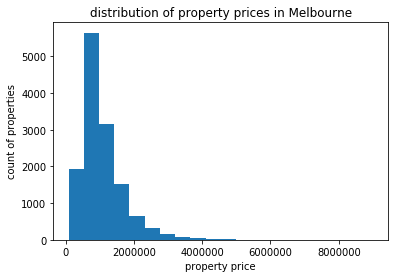

In [6]:
plt.hist(df_house['Price'], bins = 20)
plt.xlabel('property price')
plt.ylabel('count of properties')
plt.title('distribution of property prices in Melbourne')

In [7]:
sns.relplot(data=df_house, x='Price', y='Distance', kind='scatter')

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

AttributeError: module 'seaborn' has no attribute 'histplot'

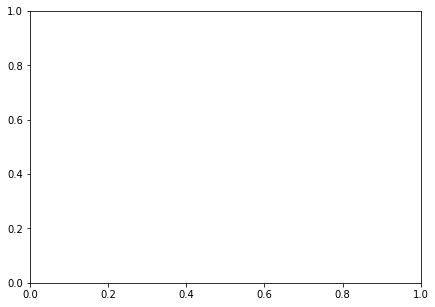

In [30]:
#sns.set_theme(style='darkgrid')
fig, axs = plt.subplots(figsize=(7,5))
sns.histplot(df_house['Price'],palette='light:m_r',bins = 20)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

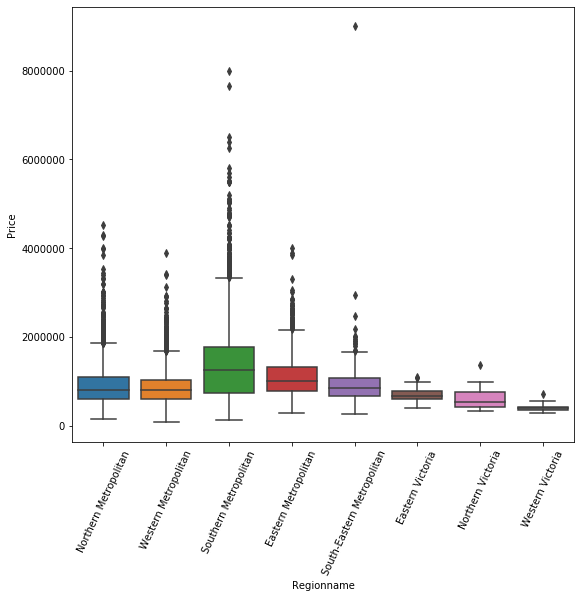

In [27]:
fig, axs = plt.subplots(figsize=(9,8))
sns.boxplot(x='Regionname',y='Price', data = df_house)
plt.xticks(rotation = 65)

<Figure size 504x360 with 0 Axes>

Text(0.5, 1.0, 'Types of properties sold in Melbourne')

Text(0.5, 0, 'Type (h/u/t)')

Text(0, 0.5, 'Count')

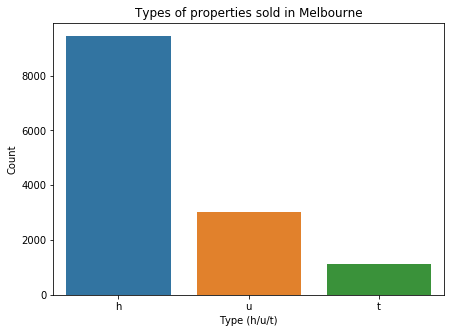

In [29]:
plt.figure(figsize=(7,5))
sns.countplot(df_house['Type'])
plt.title("Types of properties sold in Melbourne")
plt.xlabel("Type (h/u/t)")
plt.ylabel("Count")
plt.show()

<Figure size 504x360 with 0 Axes>

([<matplotlib.patches.Wedge at 0x136bd3dea08>,
 [Text(0.6491997153872743, -0.9187843759778909, 'h'),
  Text(-0.39359036616906795, 1.0539030428169849, 'u'),
  Text(-1.0878474426940914, 0.2867279920480841, 't')],
 [Text(0.3606665085484857, -0.5104357644321615, '69.6%'),
  Text(-0.21866131453837107, 0.5855016904538803, '22.2%'),
  Text(-0.6043596903856061, 0.15929332891560224, '8.2%')])

Text(0.5, 1.0, '% of types of properties sold')

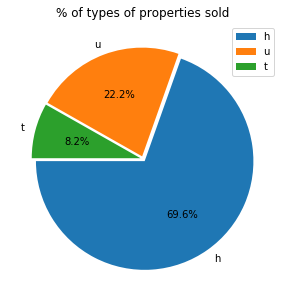

In [26]:
plt.figure(figsize=(7,5))
plt.pie(x = df_house.Type.value_counts(),labels=df_house.Type.value_counts().index,
        startangle=180,autopct='%1.1f%%',explode=(0.025,0.025,0.025))
plt.title("% of types of properties sold")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Count of properties sold with different number of rooms')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'No. of rooms')

Text(0.5, 1.0, 'Count of properties sold with different number of carspots')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'No. of carspots')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



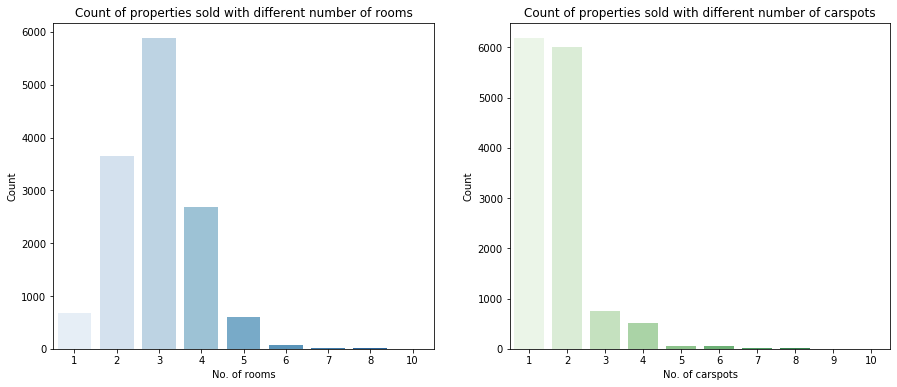

In [43]:
fig, ax = plt.subplots(1,2, figsize=(15, 6))
p1 = sns.countplot(x=df_house.Rooms,palette='Blues', ax=ax[0]);
p1.set_title("Count of properties sold with different number of rooms")
p1.set_ylabel("Count")
p1.set_xlabel("No. of rooms")
p2 = sns.countplot(x=df_house.Car,palette='Greens', ax=ax[1]);
p2.set_title("Count of properties sold with different number of carspots")
p2.set_ylabel("Count")
p2.set_xlabel("No. of carspots")
fig.show()

In [44]:
#a scatter plot of the price and the distance 
df_house.plot(x='Distance', y='Price', kind='scatter',figsize=(15,6),
        title='House Prices with distances from CBD in Melbourne')

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

<Figure size 1080x360 with 0 Axes>

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

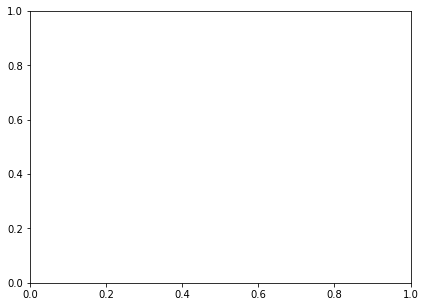

In [48]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(x=df_house.Distance,y=df_house.Price,hue=df_house.Type);
plt.title("Property prices based on distances from City Center")
plt.xlabel("Distance from CBD")
plt.ylabel("Price in AUD")

plt.subplot(1,2,2)
dist_mean = df_house.Distance.mean()
dist_less = df_house[df_house["Distance"] < dist_mean].shape[0]
dist_more= df_house[df_house["Distance"] > dist_mean].shape[0]
distance_df = pd.DataFrame({"Distance":["Less than Average Distance","More than Average Distance"], 
                            "Count":[dist_less,dist_more]})
sns.barplot(x=distance_df.Distance, y=distance_df.Count)
plt.title('Counts of properties sold based On Distance from City Center')        
plt.xlabel('Distance from CBD')
plt.ylabel('Count')
plt.show()

In [49]:
df_house[['Regionname','Price']].groupby('Regionname').mean().sort_values(by='Price', 
                                                                    ascending=False).plot.bar(figsize=(12,5), rot=45, color='teal',
                                                                                              title='Average house prices in different regions')

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

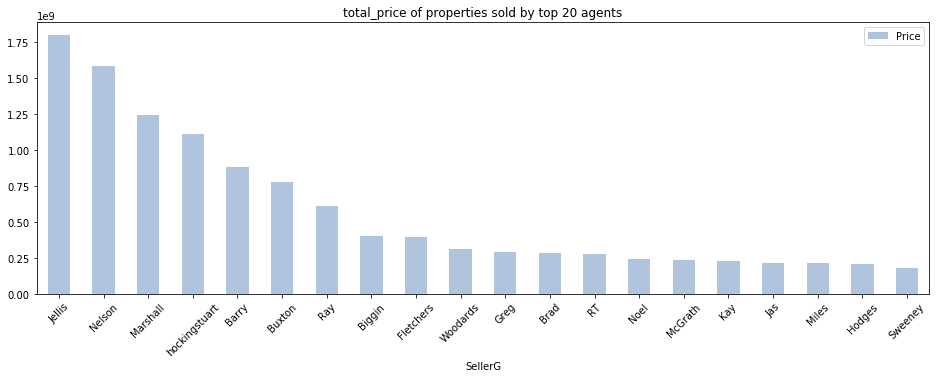

In [80]:
df_house[['SellerG','Price']].groupby('SellerG').sum().sort_values(by='Price', 
                                                                    ascending=False)[0:20].plot.bar(figsize=(16,5), rot=45, color='lightsteelblue',
                                                                                              title='total_price of properties sold by top 20 agents')

,Bathroom,Count
0,1,7512
1,2,4974
2,3,917
3,4,106
4,0,34
5,5,28
6,6,5
7,7,2
8,8,2


<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'distribution of bathrooms')

Text(0.5, 0, 'Bathroom')

Text(0, 0.5, 'Count')

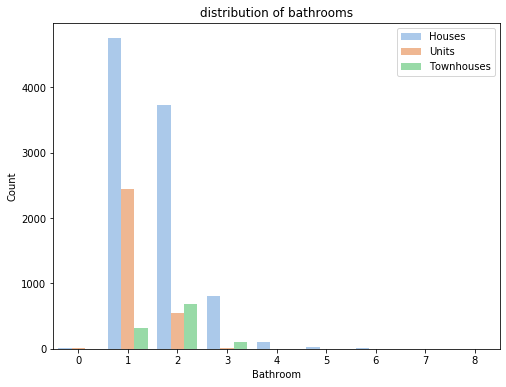

In [52]:
bathrooms_df = df_house.Bathroom.value_counts().to_frame().reset_index().rename(columns={"index":"Bathroom","Bathroom":"Count"})
display(bathrooms_df)
plt.figure(figsize=(8,6))
plt.title("distribution of bathrooms")
sns.countplot(x = df_house.Bathroom, hue=df_house.Type,palette="pastel")

plt.xlabel("Bathroom")
plt.ylabel("Count")
plt.legend(["Houses","Units","Townhouses"], loc="upper right")
plt.show()

,Suburb,Propertycount
0,Abbotsford,[4019]
1,Aberfeldie,[1543]
2,Airport West,[3464]
3,Albanvale,[1899]
4,Albert Park,[3280]
5,Albion,[2185]
6,Alphington,[2211]
7,Altona,[5301]
8,Altona Meadows,[7630]
9,Altona North,[5132]


([<matplotlib.patches.Wedge at 0x136bf0d25c8>,
 [Text(1.0354163618997623, 0.371366338687637, 'Abbotsford'),
  Text(0.7496726124091179, 0.8049788656875959, 'Aberfeldie'),
  Text(0.34686730798228316, 1.0438788582269134, 'Airport West'),
  Text(-0.15210926192417124, 1.0894323165928592, 'Albanvale'),
  Text(-0.6051188613980379, 0.9186028323385151, 'Albert Park'),
  Text(-0.9545854952051686, 0.5465954009538528, 'Albion'),
  Text(-1.0887168349192902, 0.15714850735315006, 'Alphington'),
  Text(-0.9651716423979299, -0.5276776484852118, 'Altona'),
  Text(0.04127377777622548, -1.099225397845264, 'Altona Meadows'),
  Text(0.9953482544468557, -0.4682754022683635, 'Altona North')],
 [Text(0.5647725610362339, 0.2025634574659838, '11.0%'),
  Text(0.408912334041337, 0.4390793812841432, '4.2%'),
  Text(0.18920034980851805, 0.5693884681237709, '9.4%'),
  Text(-0.08296868832227522, 0.5942358090506504, '5.2%'),
  Text(-0.33006483348983884, 0.5010560903664628, '8.9%'),
  Text(-0.5206829973846373, 0.2981429

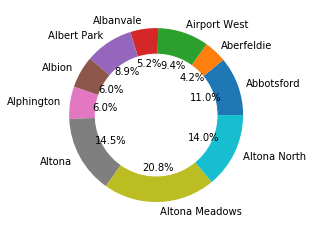

In [55]:
property_count_df = df_house.groupby("Suburb")["Propertycount"].unique().head(10).to_frame().reset_index()
my_circle=plt.Circle( (0,0), 0.7, color='white')
display(property_count_df)

plt.pie(property_count_df["Propertycount"], labels=property_count_df["Suburb"], autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## map, not done yet


In [56]:
import shapefile as shp

In [62]:
shp_path = 'Crimes2020_Hotspots.shp'
sf = shp.Reader(shp_path)

In [64]:
#sf.records()
len(sf.shapes())

7496

In [65]:
def read_shapefile(sf):
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns = fields, data = records)
    df = df.assign(coords=shps)
    return df

In [66]:
df1 = read_shapefile(sf)

In [67]:
df1.head()

,SOURCE_ID,JOIN_COUNT,Shape_Leng,Shape_Area,GiZScore,GiPValue,NNeighbors,Gi_Bin,coords
0,1,22,0.011473,0.000009,3.526557,0.000421,15,3,"[(-87.67603439999993, 42.02495156200007), (-87..."
1,2,28,0.011473,0.000009,3.547142,0.000389,15,3,"[(-87.66949950299994, 42.02495156200007), (-87..."
2,3,0,0.011473,0.000009,-1.274083,0.202634,16,0,"[(-87.69563908899994, 42.02213834600008), (-87..."
3,4,0,0.011473,0.000009,-0.295925,0.767288,18,0,"[(-87.68910419199995, 42.02213834600008), (-87..."
4,5,5,0.011473,0.000009,2.700383,0.006926,20,2,"[(-87.68256929599994, 42.02213834600008), (-87..."
